# Proyek Analisis Data: Nama dataset
- Nama: Adi Patria
- Email: adipatria2@gmail.com
- Id Dicoding: adi_patria_ugzw

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana pola permintaan sewa sepeda di kota tersebut? Kapan permintaan paling tinggi dan kapan permintaan paling rendah? dari tahun 2011 sampai 2012

- pertanyaan 2 : Bagaimana trend penggunaan sepeda oleh pengguna casual dan registered dalam dua tahun terakhir?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/bike_sharing/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv('/content/bike_sharing/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
bike_df = pd.concat([hour_df, day_df], ignore_index=True)

Dataframe ini memiliki kolom yang berbeda (yaitu hour_df memiliki kolom hr sedangkan day_df tidak), maka penggabungan tersebut akan menghasilkan kolom-kolom baru untuk dataframe gabungan.

### Assessing Data

1. Missing value: Cek apakah terdapat missing value pada dataset.

In [5]:
# mengecek informasi dataset
bike_df.info()

# menghitung jumlah missing value
bike_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

Dapat dilihat bahwa terdapat 731 nilai yang hilang pada kolom "hr". Selain itu, ada juga informasi tentang tipe data masing-masing kolom, jumlah data yang tersedia pada tiap kolom, dan apakah ada missing value pada dataset.

2. Invalid value: Cek apakah terdapat invalid value pada dataset

In [6]:
# mengecek tipe data setiap kolom
bike_df.dtypes

# melakukan pengecekan pada kolom yang seharusnya berisi data boolean
bike_df['holiday'].unique()
bike_df['workingday'].unique()

array([0, 1])

3. Duplicate data: Cek apakah terdapat duplikat data pada dataset. 

In [7]:
# menghitung jumlah data duplikat
bike_df.duplicated().sum()

0

4. Inaccurate value: Cek apakah terdapat data yang tidak akurat pada dataset. 

In [8]:
# melakukan pengecekan pada kolom suhu (temp) dan kecepatan angin (windspeed)
bike_df[['temp', 'windspeed']].describe()

,temp,windspeed
count,18110.000000,18110.000000
mean,0.496922,0.190113
std,0.192177,0.120851
min,0.020000,0.000000
25%,0.340000,0.104500
50%,0.500000,0.188951
75%,0.660000,0.253700
max,1.000000,0.850700


5. Inconsistent value: Cek apakah terdapat data yang tidak konsisten pada dataset. 

In [9]:
# mengecek nilai unik pada kolom hari (weekday)
bike_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

6. Outlier: Cek apakah terdapat outlier pada dataset.

In [10]:
# Pilih kolom unruk mengecek outlier
cols = ["hr", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

# Loop kolom untuk menemukan outliers
for col in cols:
    q25, q75 = np.percentile(bike_df[col], 25), np.percentile(bike_df[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off
    
    outliers = bike_df[(bike_df[col] < lower_bound) | (bike_df[col] > upper_bound)]
    
    print("Outliers in column {}: \n{}".format(col, outliers[col]))

Outliers in column hr: 
Series([], Name: hr, dtype: float64)
Outliers in column temp: 
Series([], Name: temp, dtype: float64)
Outliers in column atemp: 
Series([], Name: atemp, dtype: float64)
Outliers in column hum: 
1551     0.0
1552     0.0
1553     0.0
1554     0.0
1555     0.0
1556     0.0
1557     0.0
1558     0.0
1559     0.0
1560     0.0
1561     0.0
1562     0.0
1563     0.0
1564     0.0
1565     0.0
1566     0.0
1567     0.0
1568     0.0
1569     0.0
1570     0.0
1571     0.0
1572     0.0
17447    0.0
Name: hum, dtype: float64
Outliers in column windspeed: 
175      0.492500
178      0.552200
194      0.522400
196      0.522400
265      0.582100
           ...   
17328    0.492500
17341    0.582100
17343    0.582100
17344    0.656700
17428    0.507463
Name: windspeed, Length: 343, dtype: float64
Outliers in column casual: 
1633     144
1634     149
1772     174
1773     168
1774     170
        ... 
18105    247
18106    644
18107    159
18108    364
18109    439
Name: casual

Output yang dihasilkan menunjukkan adanya nilai yang dianggap sebagai outlier pada tiap kolom di dataset. Pada kolom 'hr', 'temp', dan 'atemp' tidak ditemukan nilai yang dianggap sebagai outlier, sedangkan pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt' terdapat nilai-nilai yang dianggap sebagai outlier. Untuk kolom 'hum', terdapat 24 nilai yang bernilai 0, sedangkan pada kolom 'windspeed', terdapat 343 nilai yang dianggap sebagai outlier. Sementara itu, pada kolom 'casual', 'registered', dan 'cnt', terdapat masing-masing 1602, 1254, dan 1047 nilai yang dianggap sebagai outlier.

### Cleaning Data

Metode Droping

In [11]:
# Menghapus baris yang mengandung missing value
bike_df.dropna(axis=0, inplace=True)

# Menghapus kolom yang mengandung missing value
bike_df.dropna(axis=1, inplace=True)

In [12]:
# Hitung Q1, Q3, dan IQR pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt'
Q1 = bike_df[['hum', 'windspeed', 'casual', 'registered', 'cnt']].quantile(0.25)
Q3 = bike_df[['hum', 'windspeed', 'casual', 'registered', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Filter data berdasarkan nilai yang berada di antara Q1 - 1.5*IQR dan Q3 + 1.5*IQR pada kolom 'hum', 'windspeed', 'casual', 'registered', dan 'cnt'
bike_df = bike_df[~((bike_df[['hum', 'windspeed', 'casual', 'registered', 'cnt']] < (Q1 - 1.5 * IQR)) | (bike_df[['hum', 'windspeed', 'casual', 'registered', 'cnt']] > (Q3 + 1.5 * IQR))).any(axis=1)]


bike_df[['hum', 'windspeed', 'casual', 'registered', 'cnt']] digunakan untuk memilih kolom yang akan dihitung Q1, Q3, dan IQR-nya, kemudian filter outlier hanya dilakukan pada kolom-kolom tersebut. Karena terdapat outlier pada kolom tersebut





## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15220.000000,15220,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8445.179435,NaN,2.485940,0.476150,6.517871,11.162155,0.027464,2.991853,0.714652,1.443101,0.481527,0.462608,0.644687,0.180528,23.756439,123.994350,147.750788
std,5025.796656,NaN,1.124604,0.499447,3.516644,7.156157,0.163436,1.950956,0.451595,0.647148,0.190921,0.170642,0.188477,0.112051,26.554718,113.590486,131.067353
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4111.750000,NaN,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8274.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,99.000000,118.000000
75%,12753.250000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,184.000000,228.000000


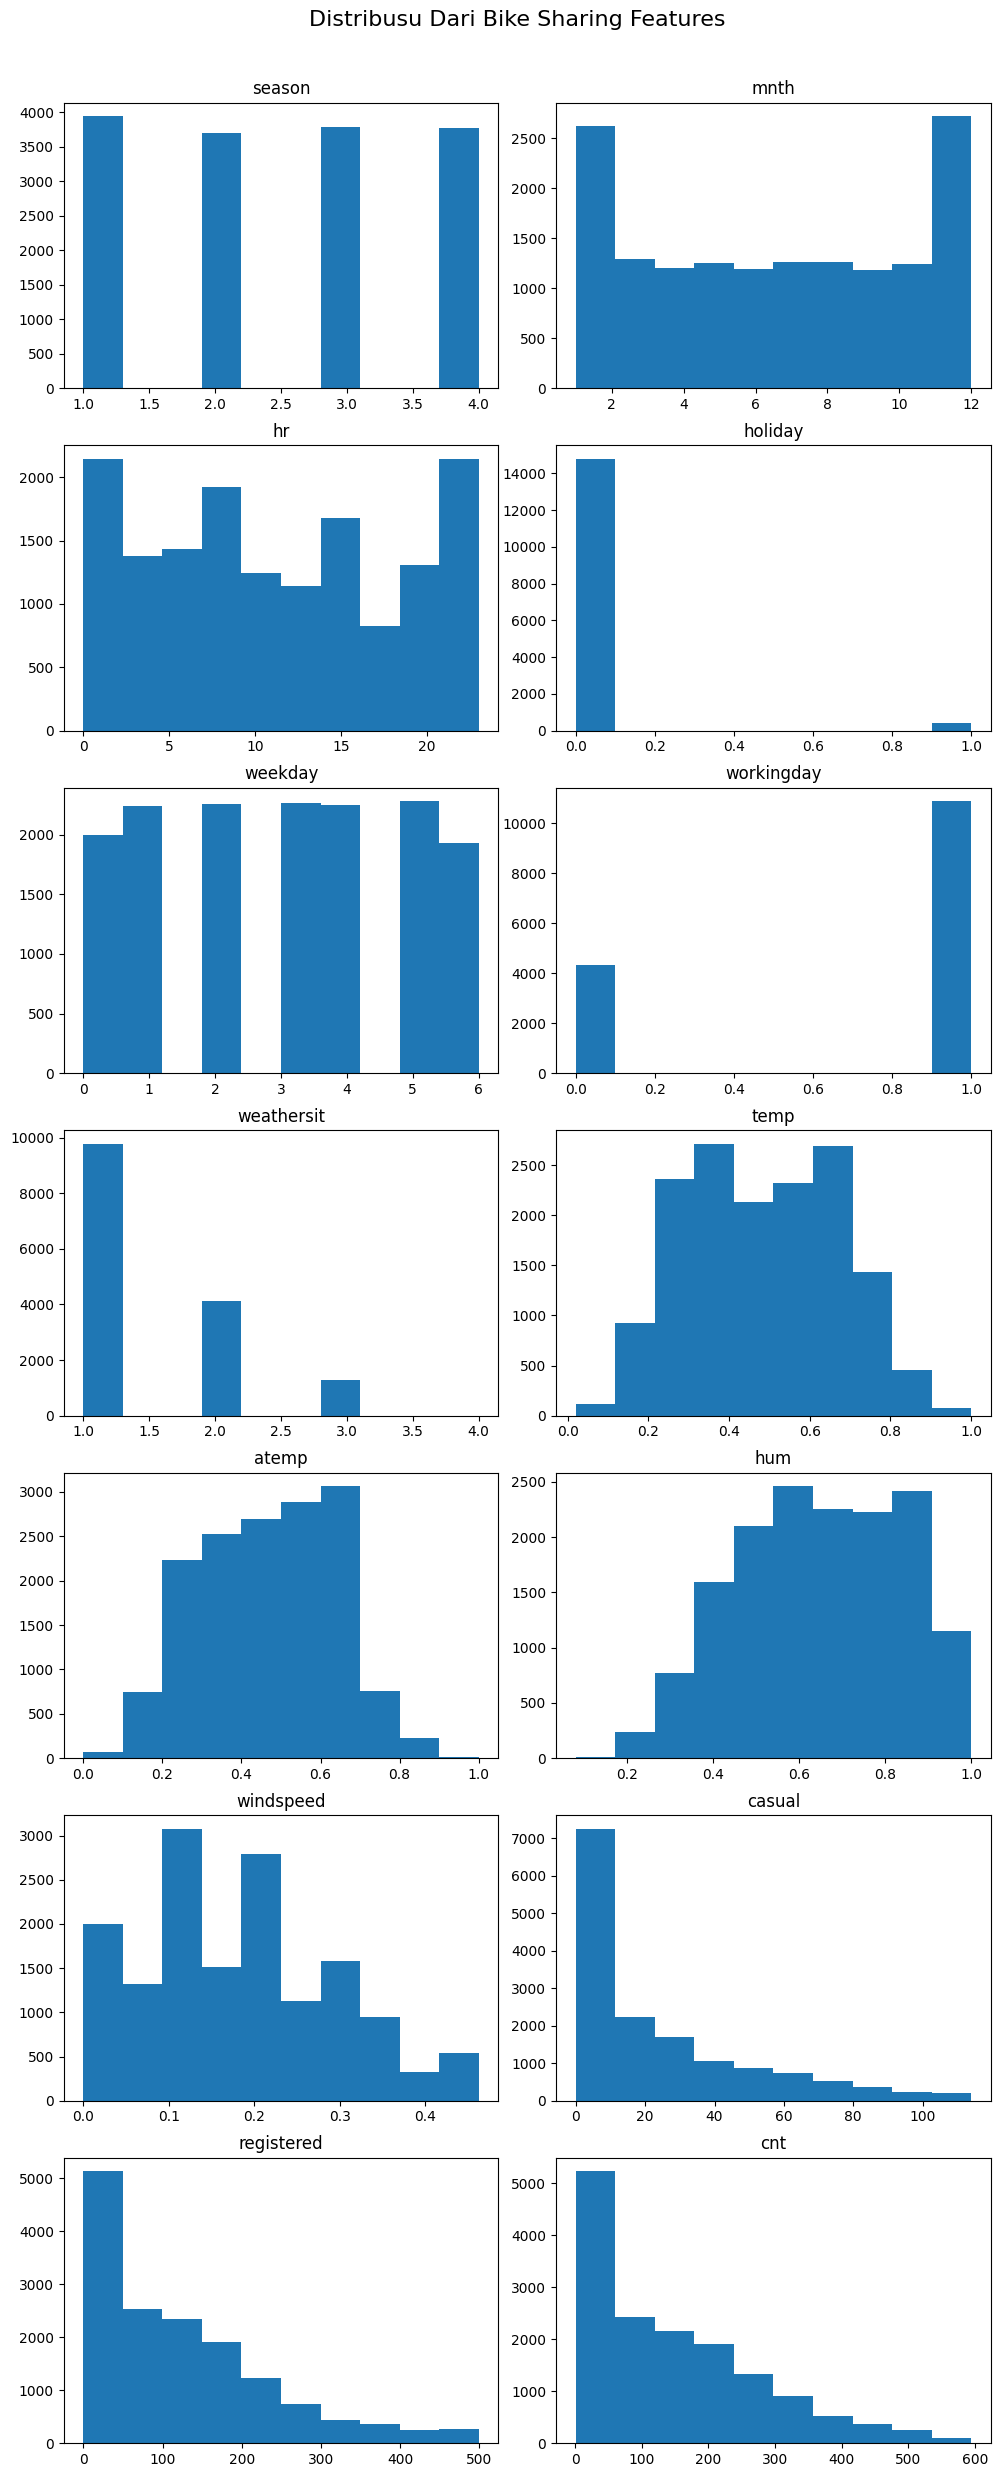

In [14]:
# Distribusi setiap variabel

fig, ax = plt.subplots(7,2, figsize=(10,24))
fig.tight_layout(h_pad=2)

fig.suptitle('Distribusu Dari Bike Sharing Features', fontsize=16, y=1.03)

features = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for i, feature in enumerate(features):
    ax[i//2, i%2].set_title(feature)
    ax[i//2, i%2].hist(bike_df[feature])

plt.show()


In [15]:
bike_df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.401002,0.860000,0.494052,-0.025117,0.018685,-0.006319,-0.003458,0.000271,0.119281,0.120931,0.032046,-0.087444,0.126584,0.192131,0.192158
season,0.401002,1.000000,-0.021479,0.826549,-0.015140,-0.019348,-0.001849,0.027744,-0.012656,0.322530,0.328597,0.160021,-0.136578,0.147114,0.163381,0.171401
yr,0.860000,-0.021479,1.000000,-0.016798,-0.025887,0.013660,-0.012472,-0.006724,-0.003081,0.013957,0.012790,-0.061801,-0.027621,0.091328,0.152953,0.151061
mnth,0.494052,0.826549,-0.016798,1.000000,-0.008444,0.012979,0.009407,0.004266,0.005499,0.210483,0.216251,0.168412,-0.126000,0.092750,0.116930,0.120129
hr,-0.025117,-0.015140,-0.025887,-0.008444,1.000000,-0.003190,-0.007116,0.033187,-0.006620,0.101208,0.099232,-0.254159,0.123128,0.384827,0.424105,0.445521
holiday,0.018685,-0.019348,0.013660,0.012979,-0.003190,1.000000,-0.098831,-0.265942,-0.016287,-0.056810,-0.060806,-0.009832,0.019242,-0.002001,-0.055280,-0.048314
weekday,-0.006319,-0.001849,-0.012472,0.009407,-0.007116,-0.098831,1.000000,0.047926,-0.000992,0.001762,-0.004327,-0.023441,0.002133,0.021517,0.031564,0.031714
workingday,-0.003458,0.027744,-0.006724,0.004266,0.033187,-0.265942,0.047926,1.000000,0.026618,0.138863,0.137281,-0.040501,0.008158,-0.078078,0.206794,0.163401
weathersit,0.000271,-0.012656,-0.003081,0.005499,-0.006620,-0.016287,-0.000992,0.026618,1.000000,-0.087035,-0.091682,0.423994,0.033713,-0.146456,-0.096617,-0.113406
temp,0.119281,0.322530,0.013957,0.210483,0.101208,-0.056810,0.001762,0.138863,-0.087035,1.000000,0.989007,-0.018772,-0.026277,0.513574,0.300987,0.364905


In [16]:
# Mengelompokkan data berdasarkan bulan
monthly_data = bike_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
print("Data pengelompokan berdasarkan bulan:")
print(monthly_data.head(12))

# Mengelompokkan data berdasarkan hari
daily_data = bike_df.groupby(['yr', 'mnth', 'weekday'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan hari:")
print(daily_data.head())

# Mengelompokkan data berdasarkan cuaca
weather_data = bike_df.groupby(['weathersit'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan cuaca:")
print(weather_data.head())

# Mengelompokkan data berdasarkan jenis hari
working_data = bike_df.groupby(['workingday'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan jenis hari:")
print(working_data.head())

# Mengelompokkan data berdasarkan jam dalam sehari
hourly_data = bike_df.groupby(['hr'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan jam dalam sehari:")
print(hourly_data.head())

# Mengelompokkan data berdasarkan jenis pelanggan
user_data = bike_df.groupby(['registered'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan jenis pelanggan:")
print(user_data.head())

# Mengelompokkan data berdasarkan tahun
yearly_data = bike_df.groupby(['yr'])['cnt'].mean().reset_index()
print("\nData pengelompokan berdasarkan tahun:")
print(yearly_data.head())

# Mengelompokkan data berdasarkan season
season_data = bike_df.groupby(['yr'])['season'].mean().reset_index()
print("\nData pengelompokan berdasarkan season:")
print(season_data.head())

Data pengelompokan berdasarkan bulan:
    yr  mnth     cnt
0    0     1   37552
1    0     2   43515
2    0     3   59027
3    0     4   75495
4    0     5  108761
5    0     6  112462
6    0     7  111705
7    0     8  112186
8    0     9   96289
9    0    10   92753
10   0    11   92069
11   0    12   85708

Data pengelompokan berdasarkan hari:
   yr  mnth  weekday        cnt
0   0     1        0  42.095652
1   0     1        1  56.299145
2   0     1        2  68.662500
3   0     1        3  57.634146
4   0     1        4  67.974684

Data pengelompokan berdasarkan cuaca:
   weathersit         cnt
0           1  155.923022
1           2  144.435550
2           3   96.972308
3           4   74.333333

Data pengelompokan berdasarkan jenis hari:
   workingday         cnt
0           0  113.859084
1           1  161.283166

Data pengelompokan berdasarkan jam dalam sehari:
    hr        cnt
0  0.0  54.069348
1  1.0  33.566852
2  2.0  22.947740
3  3.0  11.783745
4  4.0   6.414847

Data peng

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola permintaan sewa sepeda di kota tersebut? Kapan permintaan paling tinggi dan kapan permintaan paling rendah? dari tahun 2011 sampai 2012

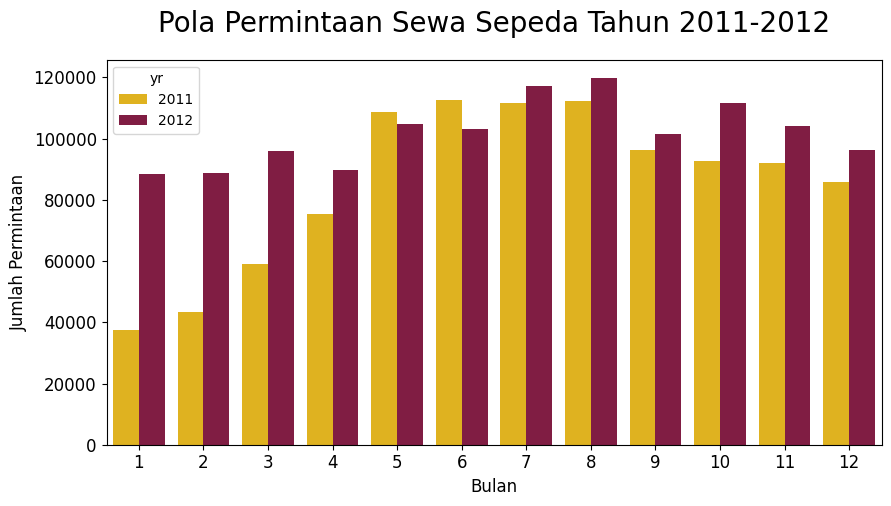

In [17]:
# Filter data berdasarkan tahun
bike_2011_2012 = bike_df.copy()
bike_2011_2012['yr'] = bike_2011_2012['yr'].replace({0: '2011', 1: '2012'})
bike_2011_2012 = bike_2011_2012[(bike_2011_2012['yr'] == '2011') | (bike_2011_2012['yr'] == '2012')]

# Group data berdasarkan bulan
monthly_data = bike_2011_2012.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Bar chart
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=monthly_data, x="mnth", y="cnt", hue="yr", ax=ax, palette=["#FFC300", "#900C3F"])
ax.set_title('Pola Permintaan Sewa Sepeda Tahun 2011-2012', fontsize=20, pad=20)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah Permintaan', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


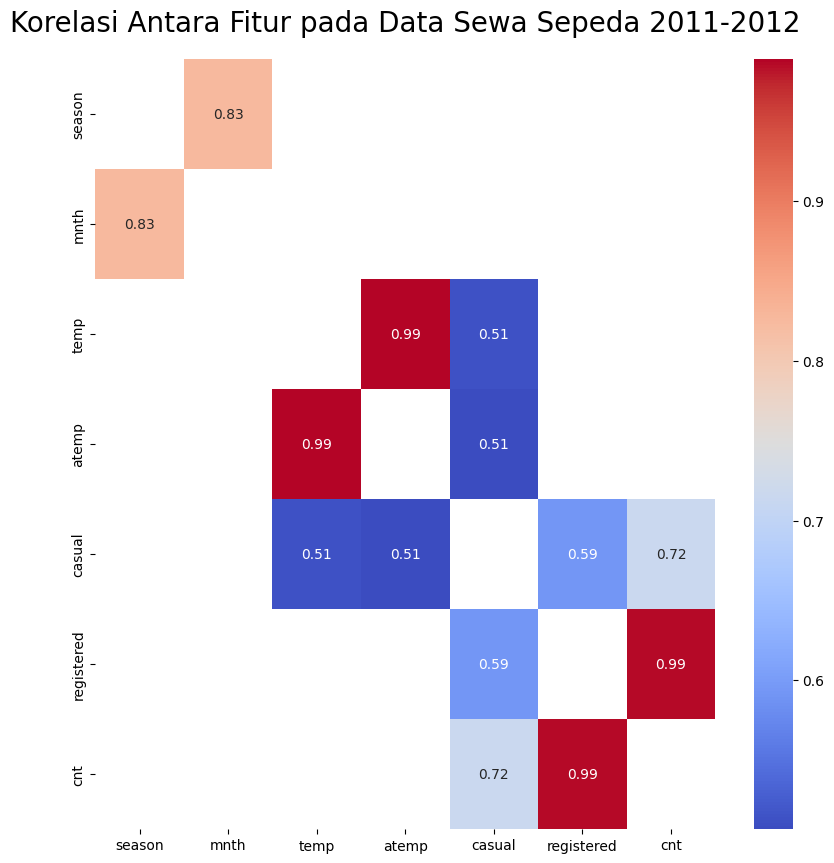

In [18]:
# Filter data berdasarkan tahun
bike_2011_2012 = bike_df.copy()
bike_2011_2012['yr'] = bike_2011_2012['yr'].replace({0: '2011', 1: '2012'})
bike_2011_2012 = bike_2011_2012[(bike_2011_2012['yr'] == '2011') | (bike_2011_2012['yr'] == '2012')]

# Lihat correlation matrix
corr_matrix = bike_2011_2012.corr()

# Filter corelasi yang relevant
relevant_corrs = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Corealasi heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(relevant_corrs, annot=True, cmap='coolwarm')
ax.set_title('Korelasi Antara Fitur pada Data Sewa Sepeda 2011-2012', fontsize=20, pad=20)

plt.show()


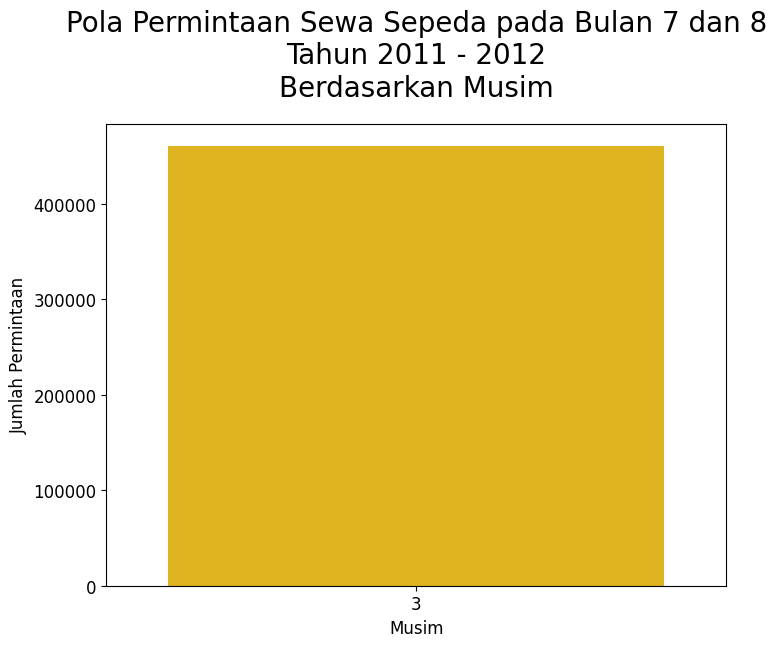

In [19]:
# Filter data tahun dengan bulan
bike_jul_aug = bike_df[(bike_df['mnth'] == 7) | (bike_df['mnth'] == 8)]

# Group data berdasar season dan jumalh sewa counts
seasonal_data = bike_jul_aug.groupby('season')['cnt'].sum().reset_index()

# Buat chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=seasonal_data, x='season', y='cnt', palette=['#FFC300', '#900C3F', '#196F3D', '#4A235A'])
ax.set_title('Pola Permintaan Sewa Sepeda pada Bulan 7 dan 8\nTahun 2011 - 2012\nBerdasarkan Musim', fontsize=20, pad=20)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Jumlah Permintaan', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


Dapat dilihat pada visualisasi yang pertama pada tahun 2011 - 2012 sewa yang tertinggi pada bulan 7 dan 8, jika dicocokan menggunakan korelasi, tabel mnth memiliki korelasi yang tinggi dengan tabel season, sehingga dapat dicari season yang paling sering muncul pada bulan 7 dan 8 yaitu season 3

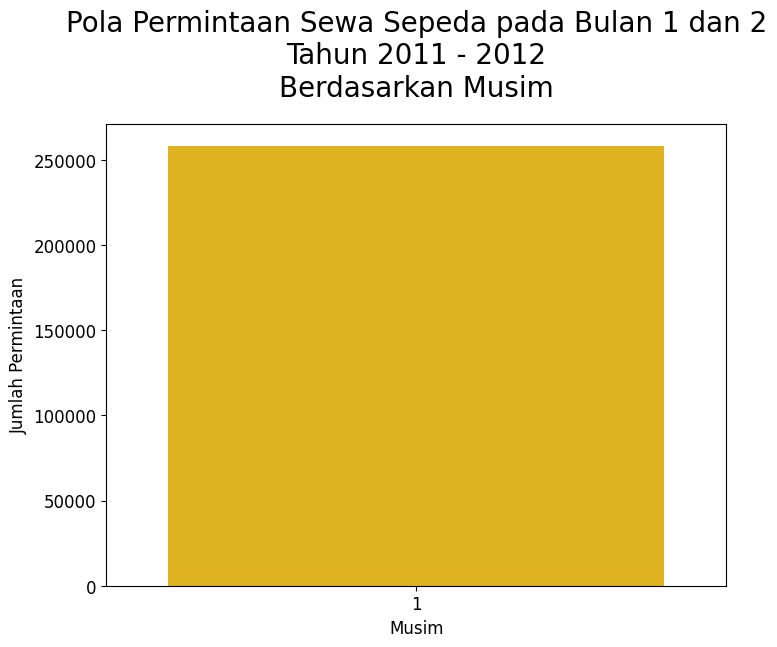

In [20]:
# Filter data tahun dengan bulan
bike_jan_feb = bike_df[(bike_df['mnth'] == 1) | (bike_df['mnth'] == 2)]

# Group data berdasar season dan jumalh sewa counts
seasonal_data = bike_jan_feb.groupby('season')['cnt'].sum().reset_index()

# Buat chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=seasonal_data, x='season', y='cnt', palette=['#FFC300', '#900C3F', '#196F3D', '#4A235A'])
ax.set_title('Pola Permintaan Sewa Sepeda pada Bulan 1 dan 2\nTahun 2011 - 2012\nBerdasarkan Musim', fontsize=20, pad=20)
ax.set_xlabel('Musim', fontsize=12)
ax.set_ylabel('Jumlah Permintaan', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


Untuk sewa yang rendah terdapat pada bulan 1 dan 2. Jika dilihat berdasarkan visualisasi data bulan 1 dan 2 meiliki nilai 1 yang berdasarkan tabel season

# Pertanyaan 2: Bagaimana trend penggunaan sepeda oleh pengguna casual dan registered dalam dua tahun terakhir?

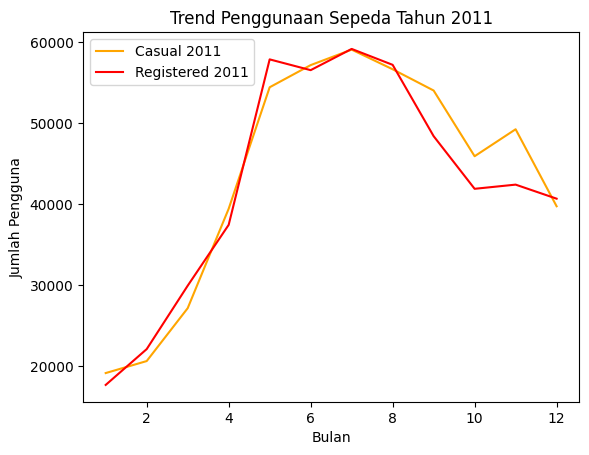

In [21]:
# Filter data tabel poengguna casual dan registered ditaun 2011
bike_df_2011_casual = bike_df[(bike_df['yr'] == 0) & (bike_df['casual'])]
bike_df_2011_registered = bike_df[(bike_df['yr'] == 0) & (bike_df['registered'])]

# Plot trend pengguna casual di tahun 2011
plt.plot(bike_df_2011_casual.groupby('mnth')['cnt'].sum(), color='orange', label='Casual 2011')

# Plot trend pengghuna registered di tahun 2011
plt.plot(bike_df_2011_registered.groupby('mnth')['cnt'].sum(), color='red', label='Registered 2011')

# Set title dan label
plt.title('Trend Penggunaan Sepeda Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')

plt.legend()

plt.show()


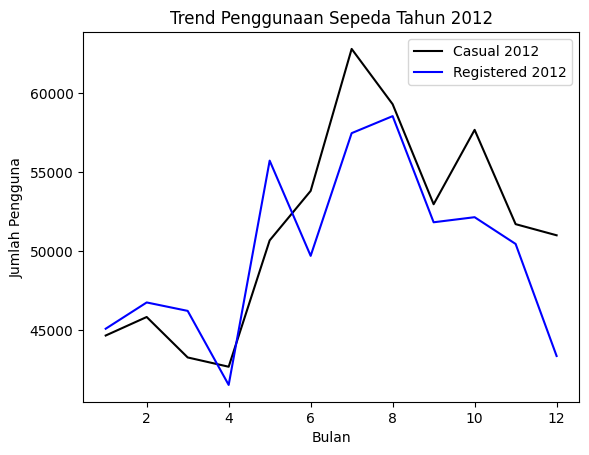

In [22]:
# Filter data tabel poengguna casual dan registered ditaun 2012
bike_df_2012_casual = bike_df[(bike_df['yr'] == 1) & (bike_df['casual'])]
bike_df_2012_registered = bike_df[(bike_df['yr'] == 1) & (bike_df['registered'])]

# Plot trend pengguna casual di tahun 2012
plt.plot(bike_df_2012_casual.groupby('mnth')['cnt'].sum(), color='black', label='Casual 2012')

# Plot trend pengghuna registered di tahun 2012
plt.plot(bike_df_2012_registered.groupby('mnth')['cnt'].sum(), color='blue', label='Registered 2012')

# Set title dan label
plt.title('Trend Penggunaan Sepeda Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')

plt.legend()

plt.show()


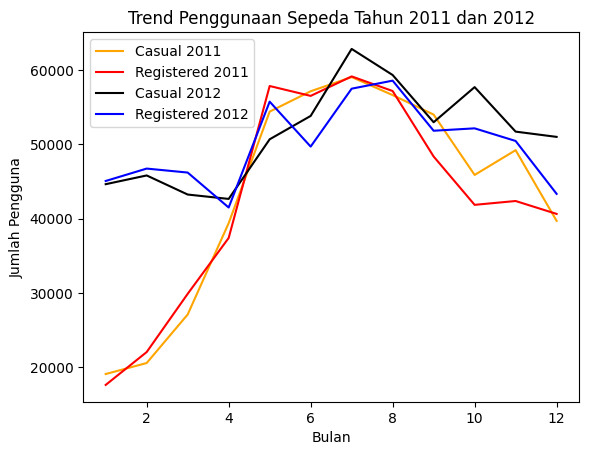

In [23]:
bike_df_2011_casual = bike_df[(bike_df['yr'] == 0) & (bike_df['casual'])]
bike_df_2011_registered = bike_df[(bike_df['yr'] == 0) & (bike_df['registered'])]

bike_df_2012_casual = bike_df[(bike_df['yr'] == 1) & (bike_df['casual'])]
bike_df_2012_registered = bike_df[(bike_df['yr'] == 1) & (bike_df['registered'])]

plt.plot(bike_df_2011_casual.groupby('mnth')['cnt'].sum(), color='orange', label='Casual 2011')

plt.plot(bike_df_2011_registered.groupby('mnth')['cnt'].sum(), color='red', label='Registered 2011')

plt.plot(bike_df_2012_casual.groupby('mnth')['cnt'].sum(), color='black', label='Casual 2012')

plt.plot(bike_df_2012_registered.groupby('mnth')['cnt'].sum(), color='blue', label='Registered 2012')

plt.title('Trend Penggunaan Sepeda Tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')

plt.legend()

plt.show()


Dapat dijelaskan trend pengguna casual dan registered ditahun 2011 dan 2012 mengalami kenaikan signifikan dai bulan 4 ke bulan 7 dan mulai mengalami penurunan daat memasuki bulan 8 hingga bulan 12

## Conclusion

- Conclution pertanyaan 1
Dapat disimpulkan bahwa pada rentang waktu 2011-2012, jumlah sewa sepeda tertinggi terjadi pada bulan Juli dan Agustus. Hal ini dapat dilihat pada visualisasi pertama yang menunjukkan puncak jumlah pengguna pada bulan-bulan tersebut. Selain itu, diduga ada korelasi antara kolom "mnth" dengan kolom "season" pada data, karena terdapat kecenderungan musim pada setiap bulannya. Oleh karena itu, season yang paling sering muncul pada bulan Juli dan Agustus adalah season 3.

- conclution pertanyaan 2
Terdapat kenaikan signifikan pada jumlah pengguna casual dan registered dari bulan April hingga bulan Juli, kemudian mulai mengalami penurunan dari bulan Agustus hingga bulan Desember. Hal ini dapat dilihat dari visualisasi data trend pengguna casual dan registered di tahun 2011 dan 2012 yang menunjukkan puncak penggunaan pada bulan-bulan tersebut. Salah satu yang menyebabkan kenaikan dan penurunan penggunaan sewa adalah musim yang sedang berlangsung.

In [24]:
bike_df.to_csv("bike_sharing_all.csv", index=False)